# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from IPython.display import display

# Запишем датафрейм в переменную и выведем первые 15 строк для ознакомления. С той же целью вызовем функцию info()

df = pd.read_csv("/datasets/real_estate_data.csv", sep = '\t')
display(df.head(15))
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

Видим, что датафрейм состоит из 23699 записей. Каждая запись хранит 22 признака объекта недвижимости.
Сразу заметно, что во многих столбцах есть пропуски. Посчитаем их точное количество:

In [2]:
for column in df:
    print(df[column].isna().value_counts())

False    23699
Name: total_images, dtype: int64
False    23699
Name: last_price, dtype: int64
False    23699
Name: total_area, dtype: int64
False    23699
Name: first_day_exposition, dtype: int64
False    23699
Name: rooms, dtype: int64
False    14504
True      9195
Name: ceiling_height, dtype: int64
False    23613
True        86
Name: floors_total, dtype: int64
False    21796
True      1903
Name: living_area, dtype: int64
False    23699
Name: floor, dtype: int64
True     20924
False     2775
Name: is_apartment, dtype: int64
False    23699
Name: studio, dtype: int64
False    23699
Name: open_plan, dtype: int64
False    21421
True      2278
Name: kitchen_area, dtype: int64
False    12180
True     11519
Name: balcony, dtype: int64
False    23650
True        49
Name: locality_name, dtype: int64
False    18157
True      5542
Name: airports_nearest, dtype: int64
False    18180
True      5519
Name: cityCenters_nearest, dtype: int64
False    18181
True      5518
Name: parks_around3000, dtype:

Выведем уникальные значения для каждого столбца:

In [3]:
for column in df.columns:
    print(column)
    print(df[column].sort_values().unique())

total_images
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 35 37 39 42 50]
last_price
[1.219e+04 4.300e+05 4.400e+05 ... 4.013e+08 4.200e+08 7.630e+08]
total_area
[ 12.   13.   13.2 ... 631.  631.2 900. ]
first_day_exposition
['2014-11-27T00:00:00' '2014-11-29T00:00:00' '2014-12-04T00:00:00' ...
 '2019-05-01T00:00:00' '2019-05-02T00:00:00' '2019-05-03T00:00:00']
rooms
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 19]
ceiling_height
[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06  

По этим данным можно сделать первые выводы. Во многих столбцах встречаются экстремальные значения. 
Например, неворятно маленькая площадь или высота потолков.
Дублируются названия населенных пунктов. Например "Мурино" и "посёлок Мурино". Также заметны проблемы с буквой ё.

С каждым столбцом разберемся по отдельности на этапе предобработки.

**Дубликаты** 

Сразу следует предположить, что дубликатов в датафрейме достаточно много.
Очевидно, что продавец может выставлять объект несколько раз - и в датафрейме один и тот же объект может появляться неоднократно с минимальными отличиями в данных.
Среди тех данных, которые минимально подвержены изменениям - площадь, этаж, этажность дома, название населенного пункта, расстояние до центра, жилая площадь, площадь кухни.
Что касается цены - изменения в цене объекта недвижимости могут быть интересны для нашего исследования. Если один и тот же объект выставлялся несколько раз с разной ценой - можем воспринимать это как разные объекты.
Поэтому отсортируем объекты с одинаковыми значениями по цене, а также по критериям, обозначенным выше.

**Избавимся от дубликатов в несколько этапов**

In [4]:
duplicates = df[df[['last_price','total_area', 'locality_name', 'rooms', 'floors_total', 'floor', 'kitchen_area', 'cityCenters_nearest']].duplicated(keep = False)]
display(duplicates)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
197,5,1600000.0,46.0,2016-04-22T00:00:00,2,NaN,5.0,NaN,2,False,...,NaN,1.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,171.0
809,7,1750000.0,44.0,2017-07-19T00:00:00,1,NaN,5.0,17.0,1,NaN,...,14.0,0.0,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,103.0
2395,9,1750000.0,44.0,2016-06-09T00:00:00,1,NaN,5.0,18.0,1,NaN,...,14.0,0.0,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,22.0
7668,20,4150000.0,45.0,2017-11-23T00:00:00,1,2.80,16.0,20.0,10,NaN,...,12.0,2.0,Санкт-Петербург,15331.0,14127.0,0.0,NaN,0.0,NaN,30.0
8296,7,1748700.0,33.5,2019-01-23T00:00:00,1,NaN,18.0,NaN,2,NaN,...,7.8,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,9.0
9661,1,2533531.0,42.5,2016-09-08T00:00:00,1,2.56,18.0,19.8,7,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
9886,1,2533531.0,42.5,2016-11-25T00:00:00,1,2.56,18.0,19.8,7,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,549.0
12223,20,59000000.0,127.5,2017-01-24T00:00:00,4,3.00,12.0,85.0,8,NaN,...,13.0,4.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,5.0
16153,4,1748700.0,33.5,2016-09-08T00:00:00,1,2.56,18.0,16.7,2,NaN,...,7.8,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,895.0
16714,15,1950000.0,33.7,2018-06-11T00:00:00,1,2.60,7.0,18.0,6,NaN,...,8.0,NaN,деревня Разметелево,NaN,NaN,NaN,NaN,NaN,NaN,131.0


Еще одна закономерность - дубликаты с обновленной информацией. Например, в одном объявлении стоит NaN в столбце про наличие балкона, а в новом столбце - 1. Задача - сохранить столбцы с максимальной информацией, а от остального - избавиться.

**197-20699**
В 197 позицию добавим корректную высоту потолков (из дубликата), поизицию 20699 удалим

**809-2395**
Удалим 809, будем считать, что 2395 содержит обновленные данные

**7668-17994**
Удалим 7668

**8296-16153**
Удалим 8296

**9661-9886**
Удалим 9886

**12223-22709**
Удалим 12223

**16714-22696**
Удалим 22696

**22974-23245**
Удалим 22974

In [5]:
df.loc[197, "ceiling_height"] = 2.50
print(df.loc[197])
df = df.drop(index = [809,20699,7668,8296,9886,12223,22696,22974]).reset_index(drop=True)
df.info()

total_images                              5
last_price                        1600000.0
total_area                             46.0
first_day_exposition    2016-04-22T00:00:00
rooms                                     2
ceiling_height                          2.5
floors_total                            5.0
living_area                             NaN
floor                                     2
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                            NaN
balcony                                 1.0
locality_name                     Сясьстрой
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                       171.0
Name: 197, dtype: object
<class 

In [6]:
duplicates2 = df[df[['last_price','total_area', 'locality_name', 'rooms', 'floors_total', 'kitchen_area', 'cityCenters_nearest']].duplicated(keep = False)]
display(duplicates2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
207,11,9000000.0,72.60,2018-09-08T00:00:00,2,2.90,5.0,43.20,4,NaN,...,11.40,NaN,Санкт-Петербург,22794.0,1645.0,2.0,276.0,3.0,485.0,NaN
1668,9,650000.0,42.00,2019-04-27T00:00:00,2,NaN,5.0,26.00,5,NaN,...,6.00,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1769,10,2566270.0,42.07,2018-12-13T00:00:00,1,NaN,15.0,NaN,8,NaN,...,11.11,NaN,посёлок Новогорелово,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1808,6,5400000.0,68.80,2018-11-16T00:00:00,2,2.75,22.0,35.55,16,NaN,...,13.67,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,24.0
2403,9,650000.0,42.00,2017-06-04T00:00:00,2,2.50,5.0,26.00,1,NaN,...,6.00,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,580.0
4046,9,2250000.0,36.00,2016-06-19T00:00:00,1,NaN,5.0,17.50,4,False,...,9.00,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,92.0
4698,9,2850000.0,50.40,2019-04-24T00:00:00,2,2.50,9.0,30.00,3,NaN,...,8.50,NaN,Шлиссельбург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4751,1,4000000.0,59.00,2019-02-22T00:00:00,2,NaN,19.0,29.00,10,NaN,...,12.00,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,12.0
5498,0,950000.0,31.00,2017-10-23T00:00:00,1,2.50,5.0,NaN,1,NaN,...,NaN,NaN,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,286.0
6208,7,1850000.0,31.00,2018-02-01T00:00:00,1,2.50,5.0,NaN,5,NaN,...,NaN,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,74.0


Убрав требование, чтобы у потенциальных дубликатов совпадал этаж, получим новую 21 пару дубликатов.
Удалим их, начиная с объектов в Санкт-Петебурге

In [7]:
df_spb_duplicates = df.query('locality_name == "Санкт-Петербург"')
duplicates3 = df_spb_duplicates[df_spb_duplicates[['last_price','total_area', 'locality_name', 'rooms', 'floors_total', 'kitchen_area', 'cityCenters_nearest']].duplicated(keep = False)]
display(duplicates3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
207,11,9000000.0,72.60,2018-09-08T00:00:00,2,2.90,5.0,43.2,4,NaN,...,11.4,NaN,Санкт-Петербург,22794.0,1645.0,2.0,276.0,3.0,485.0,NaN
6580,11,5750000.0,61.00,2018-02-12T00:00:00,2,NaN,10.0,34.0,3,NaN,...,8.5,NaN,Санкт-Петербург,14433.0,13229.0,0.0,NaN,0.0,NaN,58.0
13240,9,9000000.0,72.60,2017-02-17T00:00:00,2,NaN,5.0,43.2,5,NaN,...,11.4,NaN,Санкт-Петербург,22794.0,1645.0,2.0,276.0,3.0,485.0,802.0
14734,10,5142565.0,54.65,2018-10-01T00:00:00,2,NaN,5.0,26.0,3,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,145.0
17321,4,1846648.0,25.00,2018-03-21T00:00:00,1,NaN,23.0,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,22089.0,17417.0,0.0,NaN,1.0,136.0,45.0
18619,10,5142565.0,54.65,2018-10-01T00:00:00,2,NaN,5.0,26.0,5,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,145.0
19047,3,4370000.0,38.00,2016-06-23T00:00:00,1,NaN,9.0,19.5,1,NaN,...,NaN,NaN,Санкт-Петербург,27103.0,7640.0,1.0,624.0,0.0,NaN,620.0
19320,3,4370000.0,38.00,2016-06-23T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,27103.0,7640.0,1.0,624.0,0.0,NaN,620.0
21681,4,1846648.0,25.00,2018-03-22T00:00:00,1,NaN,23.0,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,22089.0,17417.0,0.0,NaN,1.0,136.0,45.0
21809,8,5100000.0,64.00,2017-07-18T00:00:00,2,2.80,17.0,33.6,2,NaN,...,14.0,NaN,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,456.0


Удаляем 
21809, 13240, 6580, 18619, 19320, 17321

In [8]:
df = df.drop(index = [21809, 13240, 6580, 18619, 19320, 17321]).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23685 entries, 0 to 23684
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23685 non-null  int64  
 1   last_price            23685 non-null  float64
 2   total_area            23685 non-null  float64
 3   first_day_exposition  23685 non-null  object 
 4   rooms                 23685 non-null  int64  
 5   ceiling_height        14500 non-null  float64
 6   floors_total          23599 non-null  float64
 7   living_area           21786 non-null  float64
 8   floor                 23685 non-null  int64  
 9   is_apartment          2774 non-null   object 
 10  studio                23685 non-null  bool   
 11  open_plan             23685 non-null  bool   
 12  kitchen_area          21412 non-null  float64
 13  balcony               12177 non-null  float64
 14  locality_name         23636 non-null  object 
 15  airports_nearest   

In [9]:
duplicates4 = df[df[['last_price','total_area', 'locality_name', 'rooms', 'floors_total', 'kitchen_area', 'cityCenters_nearest']].duplicated(keep = False)]
display(duplicates4)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1668,9,650000.0,42.00,2019-04-27T00:00:00,2,NaN,5.0,26.00,5,NaN,...,6.00,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1769,10,2566270.0,42.07,2018-12-13T00:00:00,1,NaN,15.0,NaN,8,NaN,...,11.11,NaN,посёлок Новогорелово,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1808,6,5400000.0,68.80,2018-11-16T00:00:00,2,2.75,22.0,35.55,16,NaN,...,13.67,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,24.0
2403,9,650000.0,42.00,2017-06-04T00:00:00,2,2.50,5.0,26.00,1,NaN,...,6.00,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,580.0
4046,9,2250000.0,36.00,2016-06-19T00:00:00,1,NaN,5.0,17.50,4,False,...,9.00,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,92.0
4698,9,2850000.0,50.40,2019-04-24T00:00:00,2,2.50,9.0,30.00,3,NaN,...,8.50,NaN,Шлиссельбург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4751,1,4000000.0,59.00,2019-02-22T00:00:00,2,NaN,19.0,29.00,10,NaN,...,12.00,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,12.0
5498,0,950000.0,31.00,2017-10-23T00:00:00,1,2.50,5.0,NaN,1,NaN,...,NaN,NaN,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,286.0
6208,7,1850000.0,31.00,2018-02-01T00:00:00,1,2.50,5.0,NaN,5,NaN,...,NaN,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,74.0
7163,10,2539460.0,32.98,2018-12-19T00:00:00,1,NaN,15.0,NaN,12,NaN,...,8.65,NaN,посёлок Новогорелово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [10]:
#Автоматически убираем оставшиеся дубликаты. Считаем, что последняя запись - верная.
df = df.drop_duplicates(
  subset = ['last_price','total_area', 'locality_name', 'rooms', 'floors_total', 'kitchen_area', 'cityCenters_nearest'],
  keep = 'last').reset_index(drop = True)
 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23670 entries, 0 to 23669
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23670 non-null  int64  
 1   last_price            23670 non-null  float64
 2   total_area            23670 non-null  float64
 3   first_day_exposition  23670 non-null  object 
 4   rooms                 23670 non-null  int64  
 5   ceiling_height        14493 non-null  float64
 6   floors_total          23584 non-null  float64
 7   living_area           21776 non-null  float64
 8   floor                 23670 non-null  int64  
 9   is_apartment          2771 non-null   object 
 10  studio                23670 non-null  bool   
 11  open_plan             23670 non-null  bool   
 12  kitchen_area          21401 non-null  float64
 13  balcony               12175 non-null  float64
 14  locality_name         23621 non-null  object 
 15  airports_nearest   

Теперь проверим, что получится, если убрать совпадения в стобце cityCenters_nearest

In [11]:
duplicates5 = df[df[['last_price','total_area', 'locality_name', 'rooms', 'floors_total', 'kitchen_area', 'floor', 'ceiling_height']].duplicated(keep = False)]
display(duplicates5.sort_values(by = 'last_price'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20872,6,3100000.0,31.00,2018-02-05T00:00:00,1,2.50,5.0,17.00,3,NaN,...,5.50,NaN,Санкт-Петербург,42308.0,14811.0,1.0,568.0,0.0,NaN,68.0
13106,3,3100000.0,31.00,2017-04-28T00:00:00,1,2.50,5.0,17.00,3,NaN,...,5.50,1.0,Санкт-Петербург,15758.0,11479.0,1.0,580.0,0.0,NaN,37.0
21674,4,3390000.0,46.00,2018-01-18T00:00:00,2,NaN,5.0,30.00,1,NaN,...,7.00,NaN,Санкт-Петербург,17487.0,16689.0,0.0,NaN,0.0,NaN,5.0
17309,14,3390000.0,46.00,2016-12-17T00:00:00,2,NaN,5.0,30.00,1,False,...,7.00,NaN,Санкт-Петербург,18233.0,16034.0,0.0,NaN,0.0,NaN,575.0
20674,10,3400000.0,32.00,2017-09-02T00:00:00,1,2.60,9.0,17.90,6,NaN,...,6.30,NaN,Санкт-Петербург,45014.0,17252.0,0.0,NaN,0.0,NaN,89.0
6594,4,3400000.0,32.00,2017-02-03T00:00:00,1,2.60,9.0,18.00,6,NaN,...,6.30,NaN,Санкт-Петербург,36893.0,11004.0,0.0,NaN,1.0,939.0,483.0
10489,0,3500000.0,45.60,2017-11-13T00:00:00,2,NaN,5.0,28.50,3,NaN,...,6.70,NaN,Санкт-Петербург,23322.0,15936.0,0.0,NaN,0.0,NaN,135.0
20587,9,3500000.0,45.60,2017-10-13T00:00:00,2,NaN,5.0,28.50,3,NaN,...,6.70,0.0,Санкт-Петербург,23180.0,15794.0,0.0,NaN,0.0,NaN,7.0
14915,7,3550000.0,44.80,2016-11-14T00:00:00,2,NaN,5.0,31.30,5,NaN,...,6.00,NaN,Санкт-Петербург,11622.0,12031.0,1.0,399.0,0.0,NaN,447.0
6873,11,3550000.0,44.80,2017-06-02T00:00:00,2,NaN,5.0,31.47,5,False,...,6.00,1.0,Санкт-Петербург,44535.0,14607.0,2.0,443.0,0.0,NaN,82.0


После сортировки по стоимости, видим, что эти дубликаты - различаются лишь по расстоянию до центра, ближайших парков и прудов.
Причем, разница в значениях мизерная. Вероятнее всего, служба по сбору геоданных допустикает некоторые флуктуации в геопозиции.
Удалим выявленные дубликаты, оставив последние записи.

In [12]:
df = df.drop_duplicates(
  subset = ['last_price','total_area', 'locality_name', 'rooms', 'floors_total', 'kitchen_area', 'floor', 'ceiling_height'],
  keep = 'last').reset_index(drop = True)
 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23649 entries, 0 to 23648
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23649 non-null  int64  
 1   last_price            23649 non-null  float64
 2   total_area            23649 non-null  float64
 3   first_day_exposition  23649 non-null  object 
 4   rooms                 23649 non-null  int64  
 5   ceiling_height        14480 non-null  float64
 6   floors_total          23563 non-null  float64
 7   living_area           21758 non-null  float64
 8   floor                 23649 non-null  int64  
 9   is_apartment          2767 non-null   object 
 10  studio                23649 non-null  bool   
 11  open_plan             23649 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               12167 non-null  float64
 14  locality_name         23600 non-null  object 
 15  airports_nearest   

Итого, в несколько этапов мы удалили 50 строк дубликатов. На следующем этапе с каждым столбцом поработаем отдельно. Где необходимо - переведем в целочисленный формат, где - переименуем, заполним пропуска и удалим артефакты и экстремальные значения.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Не выполнено задание 1.3:   
<br>Постройте общую гистограмму для всех столбцов таблицы. Например, для датафрейма data это можно сделать командой data.hist(figsize=(15, 20)).
</div>

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

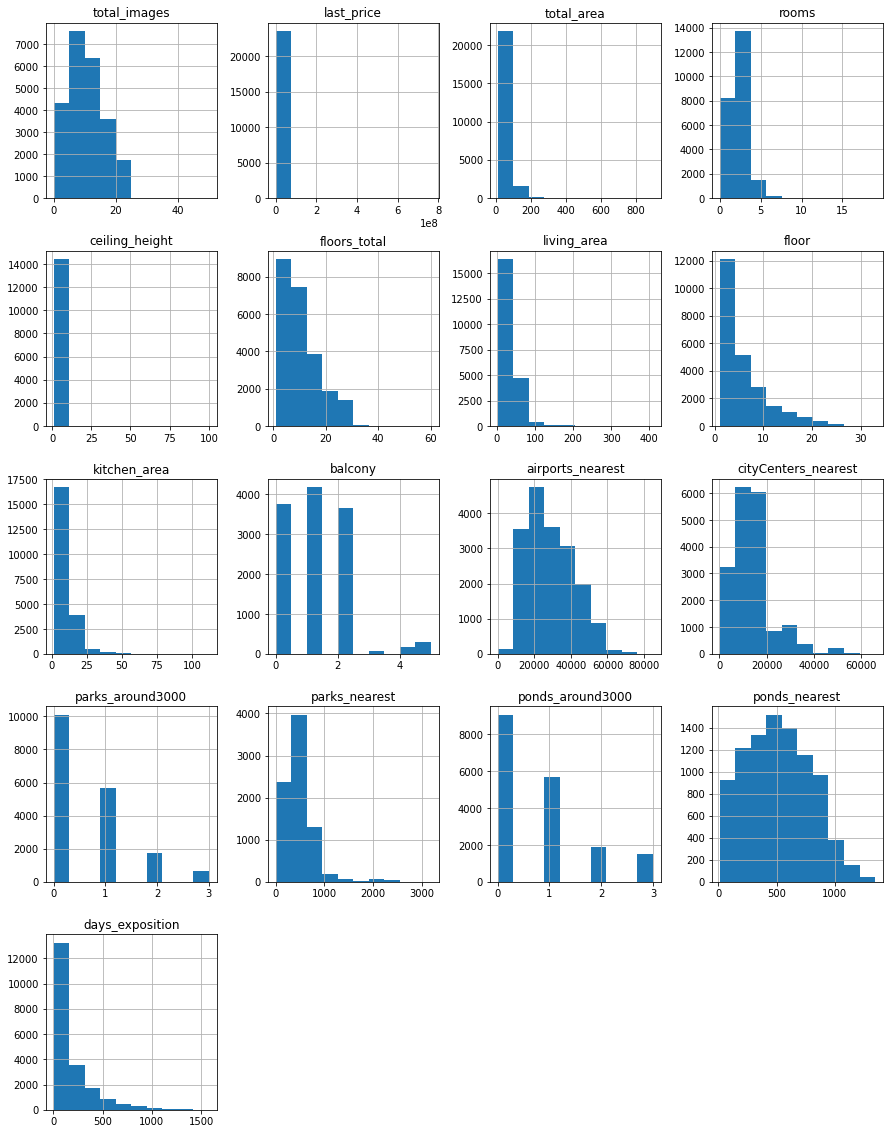

In [13]:
df.hist(figsize = (15,20))

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Сделано
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

### Предобработка данных

Приступим к работе со столбцами

Столбец **total_images**


<AxesSubplot:>

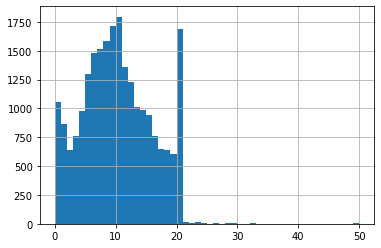

In [14]:
df['total_images'].hist(bins=50)

Видим, что количество фотографий распределено равномерно. Есть два пика - 10 и 20 фотографий. Скорее всего, это обусловлено особенностью сайта объявлений.

Столбец **last_price**

Переведем значения в столбце в целочисленный формат

In [15]:
df['last_price'] = df['last_price'].astype(int)

#Проверим на экстремальные значения

print(df.query('last_price < 300000'))

#Скорее всего, стоимость этой квартиры указана в тысячах рублей. Исправим ошибку.

df.loc[8766, "last_price"] = 12190000

print(df.query('last_price > 200000000'))

#Есть девять квартир, стоимость которых превышает 200 млн рублей. 
#Очевидных ошибок я здесь не вижу - все эти квартиры с большой площадью и достаточно близко к центру. 
#Эти данные ценны для исследования.

      total_images  last_price  total_area first_day_exposition  rooms  \
8766             7       12190       109.0  2019-03-20T00:00:00      2   

      ceiling_height  floors_total  living_area  floor is_apartment  ...  \
8766            2.75          25.0         32.0     25          NaN  ...   

      kitchen_area  balcony    locality_name  airports_nearest  \
8766          40.5      NaN  Санкт-Петербург           36421.0   

     cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8766              9176.0               1.0          805.0               0.0   

      ponds_nearest  days_exposition  
8766            NaN              8.0  

[1 rows x 22 columns]
       total_images  last_price  total_area first_day_exposition  rooms  \
1433             19   330000000       190.0  2018-04-04T00:00:00      3   
5876              3   230000000       500.0  2017-05-31T00:00:00      6   
12936            19   763000000       400.0  2017-09-30T00:00:00      7   
13712

In [16]:
df['last_price'] = (df['last_price']/1000).astype(int)
display(df['last_price'].head(10))
#Переименуем, чтобы не забыть
df = df.rename(columns={'last_price' : 'last_price_1000'})

0    13000
1     3350
2     5196
3    64900
4    10000
5     2890
6     3700
7     7915
8     2900
9     5400
Name: last_price, dtype: int64

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно cразу делить на 1млн)
</div>

<AxesSubplot:>

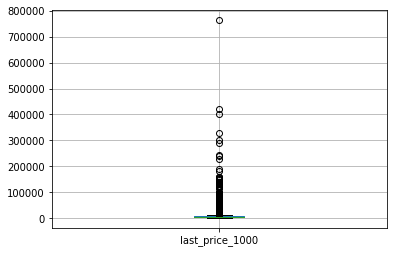

In [17]:
df.boxplot(column = 'last_price_1000')

In [18]:
df['last_price_1000'].max()

763000

<AxesSubplot:>

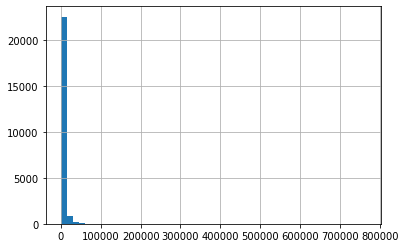

In [19]:
df['last_price_1000'].hist(bins = 50)
#Квартира стоимостью 763 млн делает график трудночитаемым

count    22930.000000
mean      5416.442739
std       3198.130422
min        430.000000
25%       3400.000000
50%       4550.000000
75%       6500.000000
max      19999.000000
Name: last_price_1000, dtype: float64

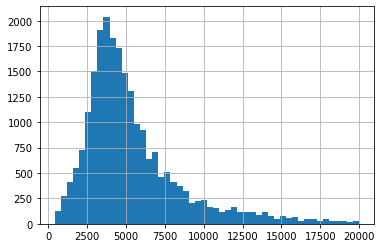

In [20]:
#Как мы видим, подавляющее большинство квартир продаются в сегменте до 20 млн рублей.
#Экстремальные значения, такие как, напрмимер,763 млн, растягивают график в ширину, делая его нечитаемым.
#Построим отдельную гисторамму для квартир стоимостью менее 20 млн
df_econom = df[df["last_price_1000"] < 20000]
df_econom['last_price_1000'].hist(bins = 50) #Можно было использовать range = ... не вводя дополнительных переменных. Поздно вспомнил
df_econom['last_price_1000'].describe()

**Вывод** 

Большинство квартир продаются в сегменте от 3 до 7 млн рублей, далее идет длинный хвост из дорогих квартир.

**Почему я не применяю ящик с усами** 

Считаю нецелесообразным удалять экстремально дорогие квартиры, так как они не являются выбросами или искажениями данных, а отражают реальные объекты с реальной стоимостью. Для того, чтобы иметь полноценное исследование, следует учесть эти объекты.

Столбец **total_area**

In [21]:
df['total_area'].describe()

count    23649.000000
mean        60.360118
std         35.673842
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

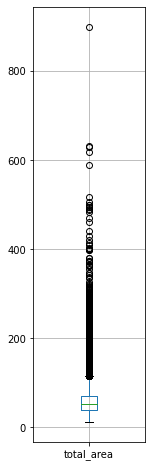

In [22]:
df.boxplot(column = 'total_area', figsize = (2,8))

In [23]:
display(df['total_area'].sort_values().head(10))
display(df['total_area'].sort_values().tail(10))

19859    12.0
19762    13.0
17919    13.0
19502    13.0
19514    13.2
19597    14.0
12007    15.0
16910    15.0
8859     15.5
9384     16.0
Name: total_area, dtype: float64

12366    495.0
14978    500.0
5876     500.0
7993     507.0
4229     517.0
5343     590.0
15612    618.0
3111     631.0
12824    631.2
19496    900.0
Name: total_area, dtype: float64

<AxesSubplot:>

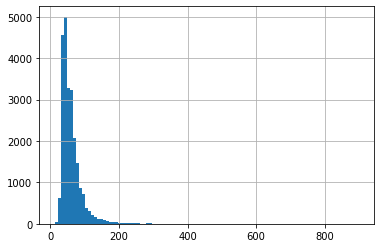

In [24]:
df['total_area'].hist(bins = 100)

<AxesSubplot:>

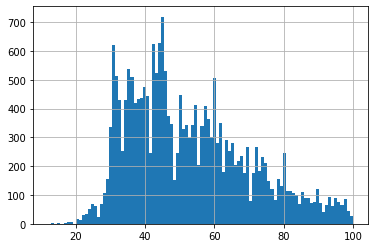

In [25]:
#Как и в предыдущем столбце, экстремальные значения мешают чтению графика.
#Взглянем отдельно на квартриры площадью меньше ста квадратных метров.
df_small = df[df['total_area'] < 100]
df_small['total_area'].hist(bins = 100)

**Вывод**

Значения в столбце корректны. Площадь большинства квартир в диапазоне от 30 до 80 метров.

Столбец **Rooms**

In [26]:
df['rooms'].describe()

count    23649.000000
mean         2.071124
std          1.078929
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [27]:
df['rooms'].value_counts()
#Пропусков нет. Но есть нулевые значения комнат.

1     8030
2     7914
3     5809
4     1178
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [28]:
df_no_rooms = df.query('rooms == 0')
df_no_rooms['total_area'].sort_values().tail(20)

15675     32.03
15665     32.20
6986      32.30
12195     32.40
18090     32.50
16482     32.80
21581     34.00
507       34.40
837       35.00
4673      35.00
9024      38.30
16091     42.10
7214      42.63
15281     43.30
9977      44.20
13576     58.40
21181     71.00
3452      73.60
20037     98.40
19348    371.00
Name: total_area, dtype: float64

Все, что меньше 40 метров - будем считать однокомнатными

От 40 до 60 - двухкомнатными

ОТ 60 до 90 - трехкомнантыми

Свыше 90 - четырехкомнатными

In [29]:
df.loc[(df['rooms']==0) & (df['total_area']<40), 'rooms'] = 1
df.loc[(df['rooms']==0) & (df['total_area']>40) & (df['total_area']<60), 'rooms'] = 2
df.loc[(df['rooms']==0) & (df['total_area']>60) & (df['total_area']<90), 'rooms'] = 3
df.loc[(df['rooms']==0) & (df['total_area']>90), 'rooms'] = 4

<AxesSubplot:>

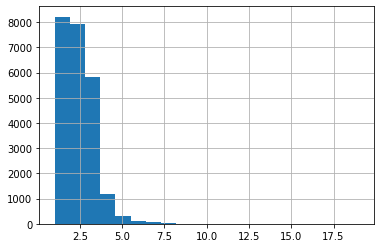

In [30]:
df['rooms'].hist(bins = 20)

In [31]:
df['rooms'].value_counts()

1     8218
2     7919
3     5811
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23649 entries, 0 to 23648
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23649 non-null  int64  
 1   last_price_1000       23649 non-null  int64  
 2   total_area            23649 non-null  float64
 3   first_day_exposition  23649 non-null  object 
 4   rooms                 23649 non-null  int64  
 5   ceiling_height        14480 non-null  float64
 6   floors_total          23563 non-null  float64
 7   living_area           21758 non-null  float64
 8   floor                 23649 non-null  int64  
 9   is_apartment          2767 non-null   object 
 10  studio                23649 non-null  bool   
 11  open_plan             23649 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               12167 non-null  float64
 14  locality_name         23600 non-null  object 
 15  airports_nearest   

**Вывод**

Мы избавились от нулей в столбце с комнатами

Количество квартир уменьшается в порядке возрастания комнат. Самые многочисленные - однокомнатные, чуть меньше двухкомнатных и так далее.

Столбец **first_day_exposition** 

In [33]:
#Изменим формат столбца с помощью pd.to_datetime()
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Столбец **ceiling_height**

In [34]:
df['ceiling_height'].describe()

count    14480.000000
mean         2.771590
std          1.262063
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [35]:
df['ceiling_height'].value_counts()

2.50     3508
2.60     1645
2.70     1572
3.00     1110
2.80      990
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [36]:
#Сначала рассмотрим экстремально большие условия. 
#В Санкт-Петербурге иногда встречаются 10-метровые потолки (например, в старых усадьбах), поэтому будем сравнивать с высотой 12м
display(df.query('ceiling_height > 12'))

,total_images,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3142,14,2900,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4633,0,4300,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4862,7,3000,25.0,2017-09-27,1,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5061,0,3850,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5231,0,2500,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5652,4,4400,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5790,17,8150,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6228,6,3300,44.4,2019-03-25,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9351,5,3950,42.0,2017-03-26,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Видим, что за исключением позиции 22820 - это вполне нормальные квартиры. Ошибка в запятой.
Чтобы исправить ее, значения столбца надо поделить на 10.

Позиция 22820 очень странная. Во-первых 100-метровый потолок, во-вторых стоимость в 15 млн при площади в 25 кв метров. Удалим эту позицию.

In [37]:
index_max_ceiling = df.query('ceiling_height > 12').index
df.loc[index_max_ceiling, 'ceiling_height'] = df.loc[index_max_ceiling, 'ceiling_height'] / 10
df = df.drop(index = 22820).reset_index(drop=True)

In [38]:
display(df.query('ceiling_height < 2'))

,total_images,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5695,5,1500,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
15023,19,5600,56.4,2018-05-11,2,1.40,14.0,32.4,5,NaN,...,9.10,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
16895,5,4100,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22542,16,6000,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


Разберемся по порядку. Первая позиция в списке - скорее всего полуподвальное помещение в поселке Мга (расположено на первом этаже). Удалим эту позицию, так как она не сильно повлияет на результат исследования.

По остальным трем позициям очевидны ошибки при вводе данных. Напрмер, вторая квартира в списке находится в 14-этажном доме и имеет заявленное значение высоты потолка в 1.4 м. Скорее всего, данные об этажности дома были занесены не в ту эчейку.
Поступим с этими значениями так же, как и с обычными пропусками в этом столбце - заменим на медиану.

<AxesSubplot:>

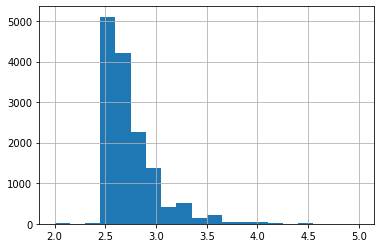

In [39]:
df.loc[[15023, 16895, 22542], "ceiling_height"] = df['ceiling_height'].median()
df = df.drop(index = 5695).reset_index(drop=True)
df['ceiling_height'].hist(bins = 20, range = (2,5))
#Построим гистограмму распределения 

In [40]:
#df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
#df['ceiling_height'].hist(range = (2,5))
#На гисторграмме видно, как сильно изменяется распределение в пользу значения 2.65 после заполнения пропусков медианой.

#Я закомментировал заполнение пропусков в данном столбце, потому что в процессе дальнейшей работы отказался от этого решения

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Это неплохое решение, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

Столбец **floors_total**

In [41]:
#Пропусков в этом столбце немного. Заполним отсутствующие значения зданиями с типовой этажностью.
for i in [5, 9, 12, 16, 24]:
    df.loc[(df['floors_total'].isna()) & (df['floor'] <= i), 'floors_total'] = i

df['floors_total'] = df['floors_total'].astype('int')
df['floors_total'].describe()

count    23647.000000
mean        10.678014
std          6.598060
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

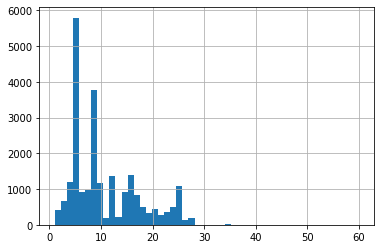

In [42]:
df['floors_total'].hist(bins=50)

Столбец **living_area**

In [43]:
#Отсутствующую жилую площадь заменим медианой, рассчитаной для квартир с аналогичным количеством комнат

df['rooms'] = df['rooms'].astype('int')  #  <--- У меня вопрос. Почему если я уже назначал тип int спустя несколько строчек кода опять возвращается float?? я вроде никаких операций со столбцом rooms больше не производил
for i in range(0, df['rooms'].max()):
    x = (df[df['rooms'] == i]['living_area'] / df[df['rooms'] == i]['total_area']).median()
    df['living_area'] = df['living_area'].fillna(value = df['total_area'] * x)
    
display(df['living_area'].sort_values().head(10))
#Теперь разберемся с экстремально низкими значениями

index_list = df.loc[(df['living_area']<6), ['living_area', 'total_area']].index
display(df.loc[index_list])

# квартирам с индексами 17539 и 21710 - добавим 10 метров жилой площади, потому что, вероятно, была пропущена единица.
# квартирам с индексами 3236 и 21894 - умножим на 10, так как скорее всего ошибка - в запятой
# Квартире 13877 установим жилую площадь 30, а квартире 23522 - 103

df.loc[[17539, 21710], "living_area"] +=10
df.loc[[3236, 21894], "living_area"] *= 10
df.loc[13877, 'living_area'] = 30
df.loc[23522, 'living_area'] = 103

display(df.loc[index_list])
#Теперь выглядит правдоподобно


21710    2.00000
13877    2.00000
3236     3.00000
23522    3.00000
17539    5.00000
21894    5.40000
16391    6.00000
17918    6.30303
19501    6.30303
19513    6.40000
Name: living_area, dtype: float64

,total_images,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3236,7,4440,41.0,2017-07-02,1,NaN,17,3.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13877,20,6350,52.0,2018-02-06,2,3.0,6,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
17539,11,2680,22.0,2018-08-11,1,NaN,25,5.0,8,NaN,...,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21710,0,2330,23.0,2018-01-01,1,NaN,24,2.0,22,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
21894,15,6100,77.6,2019-02-28,4,2.5,9,5.4,1,NaN,...,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
23522,14,64990,139.0,2015-11-24,3,3.0,8,3.0,8,NaN,...,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


,total_images,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3236,7,4440,41.0,2017-07-02,1,NaN,17,30.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13877,20,6350,52.0,2018-02-06,2,3.0,6,30.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
17539,11,2680,22.0,2018-08-11,1,NaN,25,15.0,8,NaN,...,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21710,0,2330,23.0,2018-01-01,1,NaN,24,12.0,22,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
21894,15,6100,77.6,2019-02-28,4,2.5,9,54.0,1,NaN,...,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
23522,14,64990,139.0,2015-11-24,3,3.0,8,103.0,8,NaN,...,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Хороший способ)
</div>

<AxesSubplot:>

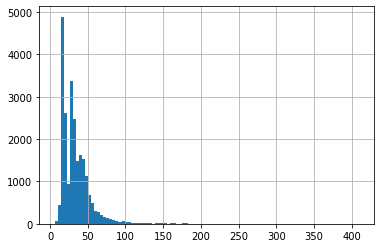

In [44]:
df['living_area'].hist(bins = 100)

<AxesSubplot:>

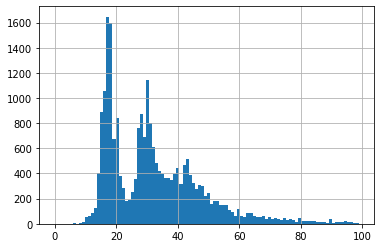

In [45]:
df['living_area'].hist(bins = 100, range = (0, 99))

На гистограмме четко видны три пика значений - они соответствуют средней жилой площади для 1, 2-х, и 3-х комнатных квартир

С этим столбцом все в порядке

Столбец **kitchen_area**

In [46]:
#Рассчитаем медиану для пропусков по аналогии с жилой площадью
for i in range(1, df['rooms'].max()):
    x = (df[df['rooms'] == i]['kitchen_area'] / df[df['rooms'] == i]['total_area']).median()
    df['kitchen_area'] = df['kitchen_area'].fillna(value = df['total_area'] * x)


bad_area =  df.query('(kitchen_area + living_area ) > total_area ')
bad_area.info()
bad_index = bad_area.index

#Получилось 167 квартир с некорректными значениями
#Поправим их

df.loc[bad_index, 'kitchen_area'] = df['kitchen_area'] * 0.5
df.loc[bad_index, 'living_area'] = df['living_area'] * 0.8

bad_area2 = df.query('(kitchen_area + living_area ) > total_area ')
bad_area2.info()
display(bad_area2)

#Теперь выпадает только одна квартира - однушка метражом 33 кв метра. Установим метраж кухни - 6м.
df.loc[11545, 'kitchen_area'] = 6



<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 184 to 23150
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          167 non-null    int64         
 1   last_price_1000       167 non-null    int64         
 2   total_area            167 non-null    float64       
 3   first_day_exposition  167 non-null    datetime64[ns]
 4   rooms                 167 non-null    int64         
 5   ceiling_height        87 non-null     float64       
 6   floors_total          167 non-null    int64         
 7   living_area           167 non-null    float64       
 8   floor                 167 non-null    int64         
 9   is_apartment          31 non-null     object        
 10  studio                167 non-null    bool          
 11  open_plan             167 non-null    bool          
 12  kitchen_area          167 non-null    float64       
 13  balcony         

,total_images,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11545,7,4300,33.0,2016-05-13,1,NaN,16,20.8,14,NaN,...,13.0,0.0,Санкт-Петербург,37180.0,12702.0,0.0,NaN,0.0,NaN,180.0


In [47]:
#Поправим экстремально маленькие значения размера кухни. Для таких квартир установим размер кухни как разницу общей и жилой площади

small_kitchen = df[df['kitchen_area'] < 4]
display(small_kitchen)
iii = small_kitchen.index
df.loc[iii, 'kitchen_area'] = (df.loc[iii, 'total_area']) - (df.loc[iii, 'living_area'])
bad_area3 = df.query('(kitchen_area + living_area ) > total_area ')
bad_area3.info()
display(bad_area3)

,total_images,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600,30.20,2018-02-14,1,2.65,9,20.880,5,NaN,...,3.100000,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
439,8,2480,27.11,2018-03-12,1,NaN,17,19.800,4,NaN,...,3.358936,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
544,9,4700,23.80,2018-12-28,1,NaN,18,16.000,9,NaN,...,2.500000,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
600,12,5600,53.70,2017-04-18,2,2.50,12,38.640,5,NaN,...,3.500000,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
904,15,2600,27.00,2017-07-10,1,2.75,23,18.000,18,NaN,...,2.000000,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,6,1737,17.78,2018-11-22,1,2.60,9,12.712,1,NaN,...,2.202947,NaN,Санкт-Петербург,13289.0,12086.0,0.0,NaN,0.0,NaN,66.0
21958,9,5000,28.30,2019-04-22,1,NaN,11,17.040,9,NaN,...,3.506377,NaN,Санкт-Петербург,30824.0,6469.0,1.0,756.0,1.0,936.0,NaN
22197,6,3100,27.30,2018-05-29,1,2.70,16,18.640,15,NaN,...,3.382477,1.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0
23139,3,1900,18.90,2016-04-04,1,NaN,16,12.800,12,NaN,...,2.341715,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          0 non-null      int64         
 1   last_price_1000       0 non-null      int64         
 2   total_area            0 non-null      float64       
 3   first_day_exposition  0 non-null      datetime64[ns]
 4   rooms                 0 non-null      int64         
 5   ceiling_height        0 non-null      float64       
 6   floors_total          0 non-null      int64         
 7   living_area           0 non-null      float64       
 8   floor                 0 non-null      int64         
 9   is_apartment          0 non-null      object        
 10  studio                0 non-null      bool          
 11  open_plan             0 non-null      bool          
 12  kitchen_area          0 non-null      float64       
 13  balcony               0 non-null

,total_images,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


С "плохими" значениями разобрались. Теперь построим гистограмму.

<AxesSubplot:>

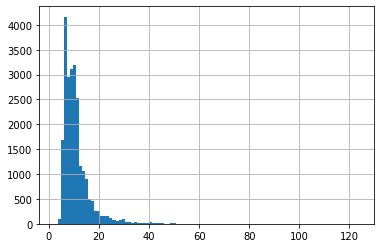

In [48]:
df['kitchen_area'].hist(bins = 100)

<AxesSubplot:>

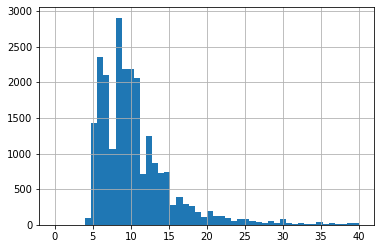

In [49]:
df['kitchen_area'].hist(bins = 50, range = (0, 40))

Как мы видим - стандартными значениями являются кухни размером 6 и 8 метров.

Столбец **is_apartment**

Исходим из того, что если не указано, что тип квартиры - апартаменты, то это не апартаменты.

In [50]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)
df['is_apartment'].describe()

count     23647
unique        2
top       False
freq      23598
Name: is_apartment, dtype: object

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

In [51]:
apartments = df[df['is_apartment'] == True]
apartments['is_apartment'].count()

49

Апартаментов в датасете немного - всего 49 позиций

Столбец **balcony**

Аналогично предыдущему столбцу, будем считать, что если нет информации - нет и балкона

In [52]:
df['balcony'] = df['balcony'].fillna(value=0)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

<AxesSubplot:>

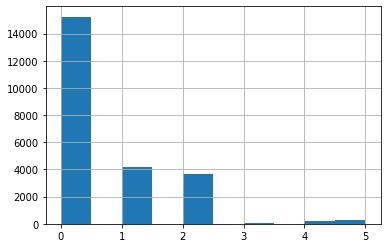

In [53]:
df['balcony'].hist()

На гистограмме видно распределение квартир с разным количеством балконов в датасете

Столбец **locality_name**

In [54]:
#Для пропусков назначим специальное значение "расположение неизвестно"
df['locality_name'] = df['locality_name'].fillna("расположение неизвестно")

In [55]:
#Во всех позициях заменим ё на е, а также создадим отдельный столбец с сокращенными названиями населенных пунктов

def short(text):
    text = text.replace('ё', 'е')
    dict =['деревня ', 
           'коттеджный поселок ', 'садовое товарищество ', 
           'поселок городского типа ', 'поселок при железнодорожной станции ', 'поселок станции ', 
           'городской поселок ', 'садоводческое некоммерческое товарищество '
           'посёлок городского типа ', 'поселок имени', 'поселок ', 'село ']
    for i in dict:
        text = text.replace(i, '')  
    return text   
df['locality_name_short'] = df['locality_name'].apply(short)

In [56]:
df['locality_name_short'].value_counts().head(10)

Санкт-Петербург    15691
Мурино               588
Кудрово              472
Шушары               440
Всеволожск           397
Пушкин               368
Колпино              338
Парголово            327
Гатчина              307
Выборг               235
Name: locality_name_short, dtype: int64

Столбец готов к последующему анализу

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

Наконец, переименуем столбец **city_centers_nearest**

In [57]:
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

# А также заполним медианой одно значение с "нулем" в столбце airports_nearest, которое я обнаружил на этапе анализа данных
df.loc[21038, 'airports_nearest'] = df['airports_nearest'].median()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23647 entries, 0 to 23646
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23647 non-null  int64         
 1   last_price_1000       23647 non-null  int64         
 2   total_area            23647 non-null  float64       
 3   first_day_exposition  23647 non-null  datetime64[ns]
 4   rooms                 23647 non-null  int64         
 5   ceiling_height        14478 non-null  float64       
 6   floors_total          23647 non-null  int64         
 7   living_area           23647 non-null  float64       
 8   floor                 23647 non-null  int64         
 9   is_apartment          23647 non-null  bool          
 10  studio                23647 non-null  bool          
 11  open_plan             23647 non-null  bool          
 12  kitchen_area          23647 non-null  float64       
 13  balcony         

Теперь удалим экстремальные значения в некоторых столбцах

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай детальнее изучим аномалии в некоторых столбцах. Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

In [58]:
display(df[df['last_price_1000'] == 763000])

,total_images,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_short
12935,19,763000,400.0,2017-09-30,7,NaN,10,250.0,10,False,...,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,Санкт-Петербург


In [59]:
display(df.sort_values(by = 'total_area'))

,total_images,last_price_1000,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_short
19858,4,2400,12.0,2017-07-19,1,2.55,5,8.000000,2,False,...,0.0,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0,Санкт-Петербург
19761,0,3800,13.0,2018-07-04,1,NaN,5,8.000000,3,False,...,0.0,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0,Санкт-Петербург
17918,3,1400,13.0,2017-12-03,1,2.60,9,6.303030,1,False,...,0.0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0,Санкт-Петербург
19501,3,1850,13.0,2019-03-11,1,3.40,5,6.303030,2,False,...,0.0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0,Санкт-Петербург
19513,2,1686,13.2,2018-12-17,1,NaN,5,6.400000,1,False,...,0.0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5343,20,65000,590.0,2019-02-14,15,3.50,6,409.000000,3,False,...,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,Санкт-Петербург
15611,20,300000,618.0,2017-12-18,7,3.40,7,258.000000,5,False,...,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,Санкт-Петербург
3111,19,140000,631.0,2019-03-30,7,NaN,5,305.939394,5,False,...,0.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,Санкт-Петербург
12823,20,140000,631.2,2019-04-09,7,3.90,4,322.300000,4,False,...,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,Санкт-Петербург


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> По поводу экстремальных значений:
<br> 
<br> Мной были удалены или изменены значения высоты потолка менее 2м
<br> Значения площади кухни менее 4м (если в сумме это не давало значение больше общей площади квартиры)
<br> Испралены несколько экстремальных значений по общей площади 
<br>(где я умножал на 10, прибавлял 10 или другими способами приводил значения в норму)
<br> 
<br> Все остальные экстремальные значения оставлены мной осознано и они не мешают анализу.
<br> Стоимость квартиры - на данный момент диапазон значений в датафрейме от 430000 до 763000000 рублей.
<br> Я считаю эти данные реалистичными. Я избавился от экстремально низких значений, меньше 400 тысяч рублей.
<br> Все остальные данные, которые присутствуют в датафрейме считаю необходимыми для анализа. 
<br> Удельный вес одной продажи квартиры за 700 миллионов в 200 раз превышает удельный вес продажи квартиры за 3.5 млн
<br> Если мы исследуем, к примеру, поведение пользователя в приложении, то, если встретить цифру, что пользователь
<br> провел 700 часов подряд в приложении, то такие данные действительно являются экстремальными. 
<br> Однако, если мы исследуем продажи, то верхние 10% никак нельзя отбрасывать, потому что это попросту испортит все данные.
<br> 
<br> Количество комнат - от 1 до 19. 
<br> Не вижу негативного воздействия на датафрейм, если в нем останутся загородные дома с большим количеством комнат
<br>
<br> Общая площадь - от 12кв м до 900кв м 
<br> Аналогично, не вижу негативных последствий от того, чтобы оставить эти данные.
<br>
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Как я уже написал выше, аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Эти данные образовывают отдельную категорию на рынке, это элитная недвижимость и на фоне общего числа данных её крайне мало именно поэтому её нужно убрать, потому что нам недостаточно данных для исследования этой категории, но при этом такие значения, могут повлиять на общие расчеты.
    
<br>Так же не забывай, что у нас учебный проект и будет не лишним поработать над аномалиями в разных столбцах, чтобы отработать этот навык, тем более это задание указано в описании к проекту, а не я сам его придумал)

</div>


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Ок, сделаю. Мой комментарий ниже, где вывод.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23647 entries, 0 to 23646
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23647 non-null  int64         
 1   last_price_1000       23647 non-null  int64         
 2   total_area            23647 non-null  float64       
 3   first_day_exposition  23647 non-null  datetime64[ns]
 4   rooms                 23647 non-null  int64         
 5   ceiling_height        14478 non-null  float64       
 6   floors_total          23647 non-null  int64         
 7   living_area           23647 non-null  float64       
 8   floor                 23647 non-null  int64         
 9   is_apartment          23647 non-null  bool          
 10  studio                23647 non-null  bool          
 11  open_plan             23647 non-null  bool          
 12  kitchen_area          23647 non-null  float64       
 13  balcony         

In [61]:
#Удалю верхние 2 процента значений для столбца со стоимостью, площадью кухни и общей площадью, 
# а также все квартиры, которые имеют более, чем десять комнат
df['last_price_1000'].describe(percentiles =[0.1, 1/4, 1/2, 3/4, 0.95, 0.98])

count     23647.000000
mean       6541.307100
std       10888.863332
min         430.000000
10%        2500.000000
25%        3420.000000
50%        4650.000000
75%        6800.000000
95%       15300.000000
98%       25000.000000
max      763000.000000
Name: last_price_1000, dtype: float64

In [62]:
df = df[df['last_price_1000'] < 25000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23158 entries, 0 to 23646
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23158 non-null  int64         
 1   last_price_1000       23158 non-null  int64         
 2   total_area            23158 non-null  float64       
 3   first_day_exposition  23158 non-null  datetime64[ns]
 4   rooms                 23158 non-null  int64         
 5   ceiling_height        14150 non-null  float64       
 6   floors_total          23158 non-null  int64         
 7   living_area           23158 non-null  float64       
 8   floor                 23158 non-null  int64         
 9   is_apartment          23158 non-null  bool          
 10  studio                23158 non-null  bool          
 11  open_plan             23158 non-null  bool          
 12  kitchen_area          23158 non-null  float64       
 13  balcony         

In [63]:
df['total_area'].describe(percentiles =[0.1, 1/4, 1/2, 3/4, 0.95, 0.98])

count    23158.000000
mean        57.528198
std         26.404195
min         12.000000
10%         32.900000
25%         40.000000
50%         51.200000
75%         68.000000
95%        105.300000
98%        132.000000
max        460.800000
Name: total_area, dtype: float64

In [64]:
df = df[df['total_area'] <= 143.24]
df = df[df['rooms'] <= 10]
#Для столбца с кухнями удалю также все квартиры с кухнями, меньше 4.5 метров
df['kitchen_area'].describe(percentiles =[0.1, 1/4, 1/2, 3/4, 0.95, 0.98])

count    22819.000000
mean        10.294550
std          4.756245
min          2.290000
10%          6.000000
25%          7.000000
50%          9.200000
75%         12.000000
95%         18.983367
98%         24.400000
max         64.000000
Name: kitchen_area, dtype: float64

In [65]:
df = df[df['kitchen_area'] <= 26]
df = df[df['kitchen_area'] > 4.5]

In [66]:
df['living_area'].describe(percentiles =[0.1, 1/4, 1/2, 3/4, 0.95, 0.98])
# Минимальное значение жилой площади выставим в 10м, а также удалим верхние 2 процента значений

count    22411.000000
mean        31.299276
std         14.369708
min          6.000000
10%         16.100000
25%         18.400000
50%         29.400000
75%         40.000000
95%         57.950000
98%         69.260000
max        118.500000
Name: living_area, dtype: float64

In [67]:
df = df[df['living_area'] < 73]
df = df[df['living_area'] > 10]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22025 entries, 0 to 23646
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22025 non-null  int64         
 1   last_price_1000       22025 non-null  int64         
 2   total_area            22025 non-null  float64       
 3   first_day_exposition  22025 non-null  datetime64[ns]
 4   rooms                 22025 non-null  int64         
 5   ceiling_height        13387 non-null  float64       
 6   floors_total          22025 non-null  int64         
 7   living_area           22025 non-null  float64       
 8   floor                 22025 non-null  int64         
 9   is_apartment          22025 non-null  bool          
 10  studio                22025 non-null  bool          
 11  open_plan             22025 non-null  bool          
 12  kitchen_area          22025 non-null  float64       
 13  balcony         

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Я очистил датафрейм от экстремальных значений:
<br> Удалил строки, содержащие верхние 2 процента значений для столбцов:
<br> общая площадь, жилая площадь, площадь кухни, цена
<br> Также из датафрейма удалены все квартиры, которые
<br> имеют более 10 комнат, площадь кухни меньше 4.5 кв метра, жилая площадь меньше 10 кв. метров
<br> Итого до обработки датафрейм состоял из 23699 позиций, после совершенных действий осталось 22025
<br> Удалены 1674 позиции, что составляет 7.06 процента от общего количества позиций
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Отлично! Теперь всё верно)
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [69]:
#Цена за квадратный метр в тысячах рубей
df['price_m_1000'] = df['last_price_1000'] / df['total_area']

# Добавим столбцы, где обозначены отдельно день, месяц и год публикации. 
df['day_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year

# Добавим сортировку по этажам
df['floor_type'] = 'другой'
df.loc[df['floor'] == 1, 'floor_type'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'последний'

# Добавим соотношение площадей
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

#Добавим расстояние до центра в километрах
df['city_center_km'] = df['city_centers_nearest']/1000

Необходимые для анализа столбцы добавлены!

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22025 entries, 0 to 23646
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22025 non-null  int64         
 1   last_price_1000       22025 non-null  int64         
 2   total_area            22025 non-null  float64       
 3   first_day_exposition  22025 non-null  datetime64[ns]
 4   rooms                 22025 non-null  int64         
 5   ceiling_height        13387 non-null  float64       
 6   floors_total          22025 non-null  int64         
 7   living_area           22025 non-null  float64       
 8   floor                 22025 non-null  int64         
 9   is_apartment          22025 non-null  bool          
 10  studio                22025 non-null  bool          
 11  open_plan             22025 non-null  bool          
 12  kitchen_area          22025 non-null  float64       
 13  balcony         

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

**Площадь квартиры**

In [71]:
df['total_area'].describe()

count    22025.000000
mean        54.202898
std         19.343628
min         16.000000
25%         39.400000
50%         50.000000
75%         65.000000
max        141.000000
Name: total_area, dtype: float64

<AxesSubplot:>

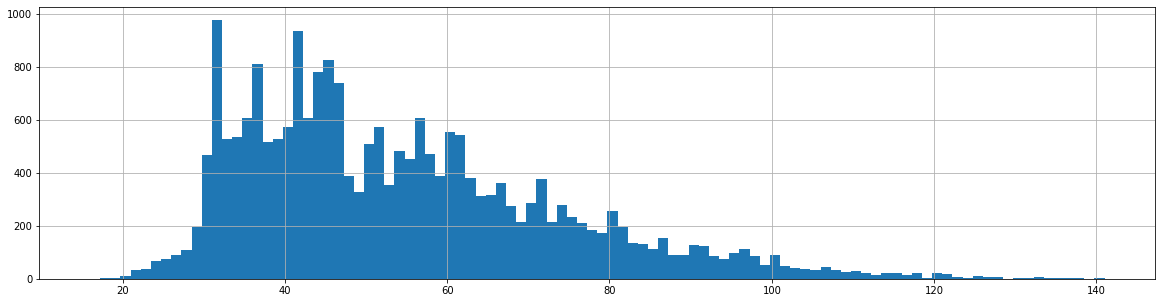

In [72]:
df['total_area'].hist(bins=100, figsize=(20,5)) 

<AxesSubplot:>

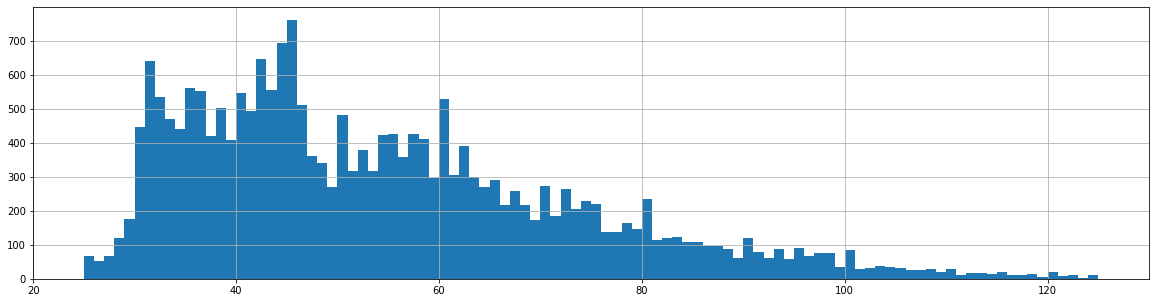

In [73]:
df['total_area'].hist(bins=100, range =(25, 125), figsize=(20,5))

На графике видны пики, обозначающие 1, 2 и 3-х комнатные квартиры. Средняя площадь - 60м, Медианная - 52.

**Количество комнат**

In [74]:
df['rooms'].describe()

count    22025.000000
mean         1.954552
std          0.880880
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

<AxesSubplot:>

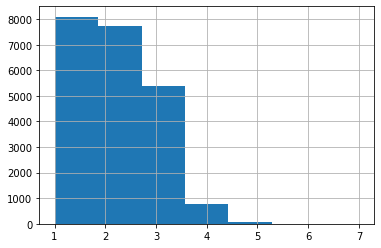

In [75]:
df['rooms'].hist(range = (1,7), bins = 7)

"Однушки" и "двушки" - самый распространенный тип квартир в датасете

**Площадь кухни**

In [76]:
df['kitchen_area'].describe()

count    22025.000000
mean         9.912537
std          3.755441
min          4.522359
25%          7.000000
50%          9.000000
75%         11.600000
max         26.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

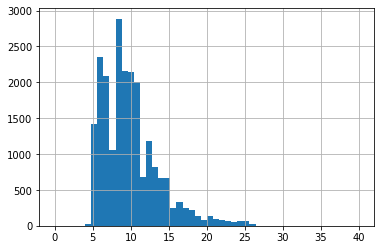

In [77]:
df['kitchen_area'].hist(bins = 50, range = (0, 40))

Из гистограммы видно, что самой распространенной площадью кухни являются  значения в 6 и 8 метров, а также другие значения, близкие к этим

**Жилая площадь**

In [78]:
df['living_area'].describe()

count    22025.000000
mean        30.600720
std         13.020866
min         10.080000
25%         18.400000
50%         29.090909
75%         39.600000
max         72.800000
Name: living_area, dtype: float64

<AxesSubplot:>

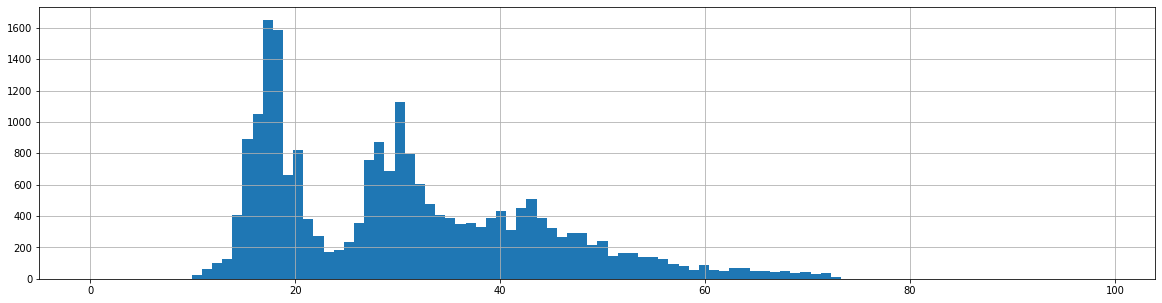

In [79]:
df['living_area'].hist(bins = 100, range = (0, 99), figsize = (20,5))

Как мы уже отмечали на этапе предобработки, на данной гистограмме четко видны три пика значений - они соответствуют средней жилой площади для 1, 2-х, и 3-х комнатных квартир.
Большинство квартир имеют жилую площадь от 15 до 50 квадратных метров. Также виден длинный хвост из квартир с большой жилой площадью - тут свое слово сказала загородная недвижимость.

**Высота потолков**

In [80]:
df['ceiling_height'].describe()

count    13387.000000
mean         2.697961
std          0.266108
min          2.000000
25%          2.500000
50%          2.600000
75%          2.760000
max         10.300000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

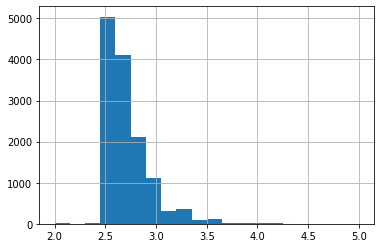

In [81]:
df['ceiling_height'].hist(bins = 20, range = (2,5))

Из того небольшого количества (по отношению к общему числу объявлений) данных о высоте потолков, можно сделать вывод, что минимальное значение - 2.5м - является самым распространенным. Далее количество квартир уменьшается по мере увеличения высоты потолков.

**Этаж квартиры**

In [82]:
df['floor'].describe()

count    22025.000000
mean         5.934711
std          4.922972
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

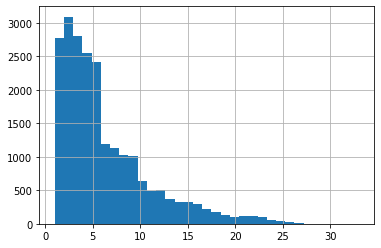

In [83]:
df['floor'].hist(bins = 33)

Самый распространенный этаж - второй. В целом, за исключением первого этажа, верно утверждение, что чем выше этаж - тем реже такая квартира встречается в таблице.

**Тип этажа**

<AxesSubplot:>

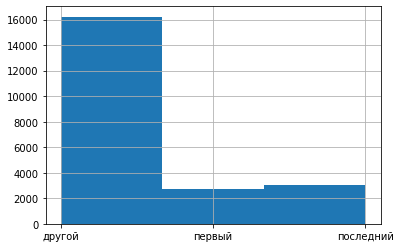

In [84]:
df['floor_type'].hist(bins = 3)

Самый распространненый тип этажа - не первый и не последний

**Количество этажей в доме**

In [85]:
df['floors_total'].describe()

count    22025.000000
mean        10.832645
std          6.643930
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

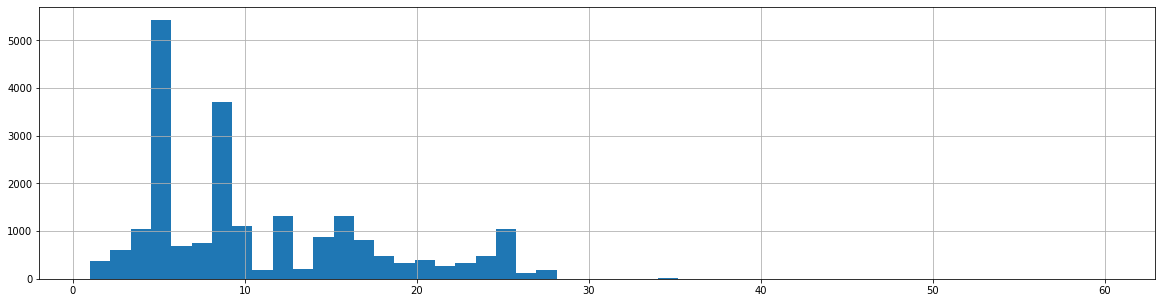

In [86]:
df['floors_total'].hist(bins = 50,figsize = (20,5))

Среди представленых, в списке лидируют дома типовой этажности - 5, 9, 12, 16 и 24 этажа.

**Расстояние до центра города в метрах**

In [87]:
df['city_centers_nearest'].describe()

count    16631.000000
mean     14721.003067
std       8495.411705
min        208.000000
25%      10326.000000
50%      13395.000000
75%      16556.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

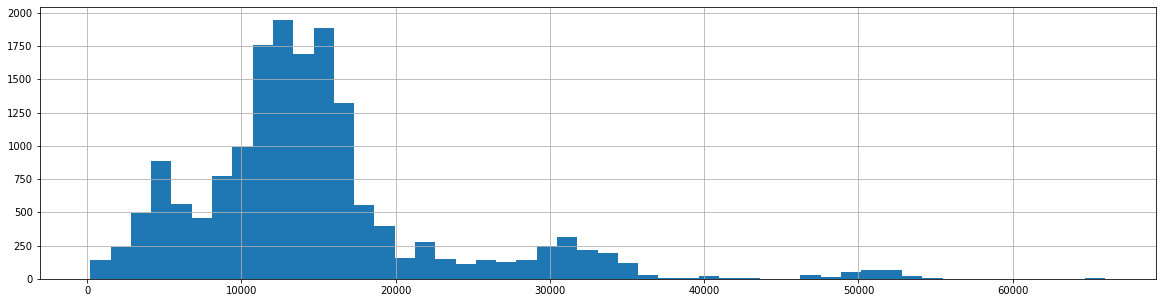

In [88]:
df['city_centers_nearest'].hist(bins = 50,figsize = (20,5))

Из гистограммы видно, что большинство жилого фонда расположено в спальных районах - от 10 до 17 км от центра.

**Расстояние до ближайшего аэропорта**

In [89]:
df['airports_nearest'].describe()

count    16613.000000
mean     28915.750467
std      12884.252020
min       6450.000000
25%      18242.000000
50%      27107.000000
75%      37504.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

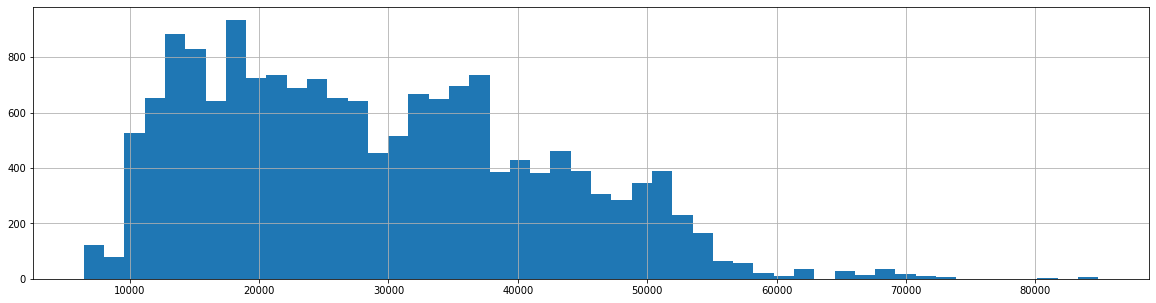

In [90]:
df['airports_nearest'].hist(bins = 50,figsize = (20,5))

Минимальное расстояние до аэропорта - 6.45 км. Расстояние до аэропорта равномерно распределяется по всему датасету, значения ровные, большинство квартир расположено на расстоянии от 10 до 40 км.

**Расстояние до ближайшего парка**

In [91]:
df['parks_nearest'].describe()

count    7085.000000
mean      495.231475
std       341.602905
min         1.000000
25%       290.000000
50%       458.000000
75%       617.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

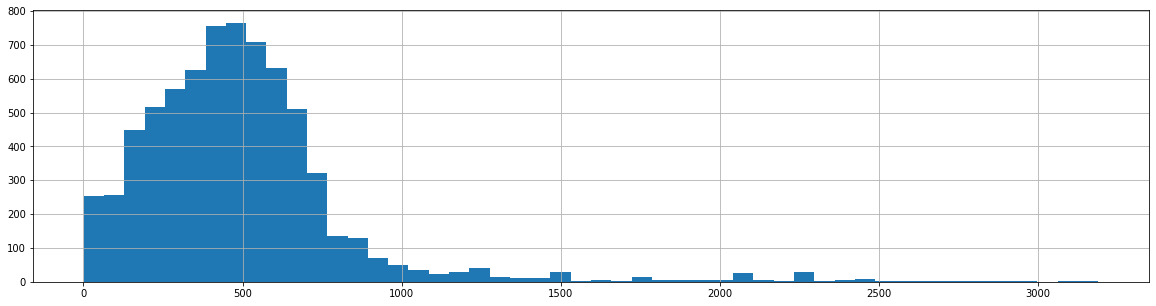

In [92]:
df['parks_nearest'].hist(bins = 50,figsize = (20,5))

Из гистораммы видно, что парков Петербурге много. Подавляющее большинство квартир имеют ближайший парк меньше чем в 1км.
Самое распространенное расстояние - 500м.

**День и месяц публикации объявления**

<AxesSubplot:>

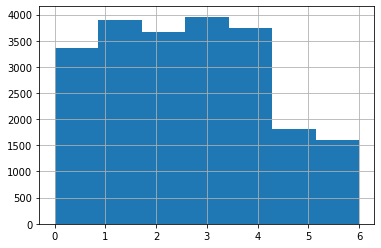

In [93]:
df['day_exposition'].hist(bins = 7)

Видим, что по выходным в публикуется, в среднем, в два раза меньше объявлений, чем по будням

<AxesSubplot:>

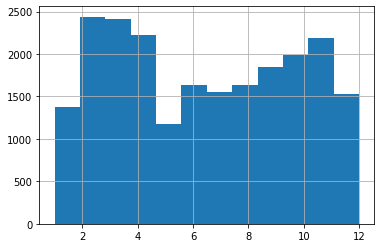

In [94]:
df['month_exposition'].hist(bins = 12)

Летний период плюс май и новогодние праздники (декабрь, январь) - низкий сезон.
Пик активности продаж приходится на весну и осень.

**Цена**

Наконец, приступим к анализу цены на квартиры

In [95]:
df['last_price_1000'].describe()

count    22025.000000
mean      5192.050897
std       2951.071701
min        430.000000
25%       3350.000000
50%       4500.000000
75%       6200.000000
max      24821.000000
Name: last_price_1000, dtype: float64

<AxesSubplot:>

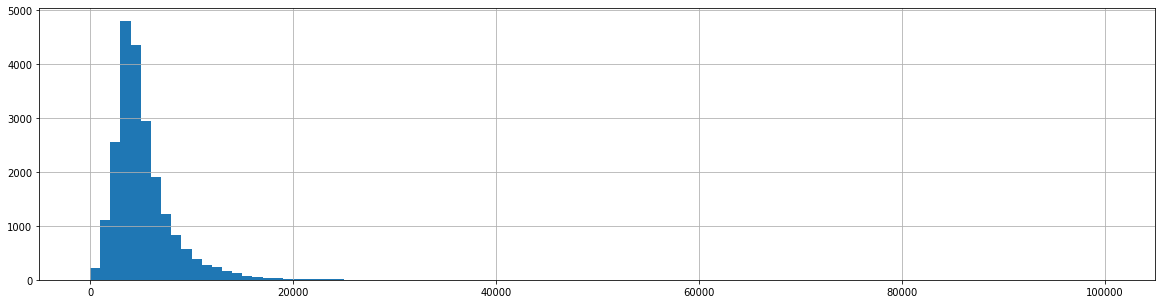

In [96]:
df['last_price_1000'].hist(range = (0, 100000), bins = 100,figsize = (20,5))

<AxesSubplot:>

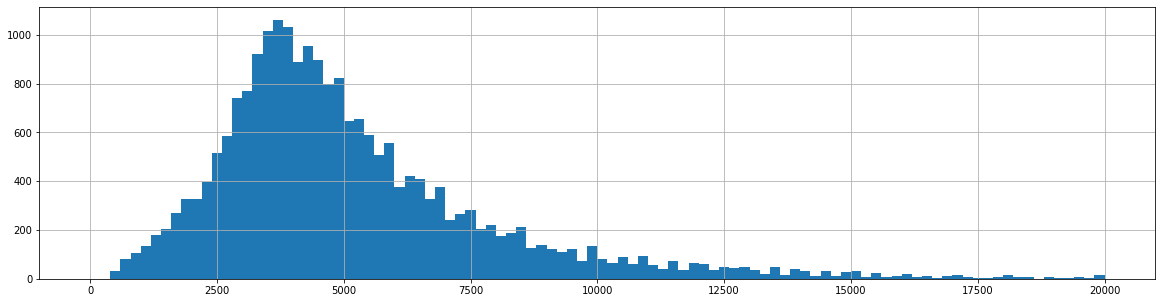

In [97]:
df['last_price_1000'].hist(range = (0, 20000), bins = 100,figsize = (20,5))

Большинство квартир стоят в диапазоне от 2 до 10 млн рублей. Самая распространенная стоимость - в окрестности 4млн рублей. Есть уникальные квартиры дороже 50 млн рублей. Самый дорогой лот стоит 763 млн рублей.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для того чтобы подписать график мы можем использовать метод plt.title() и в конце кода применить plt.show(). По ссылкам ниже можно почитать подробнее как добавить название для графика или подписать его оси
    
    https://pyprog.pro/mpl/mpl_title.html
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

**ЗАДАНИЕ**
"Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

In [98]:
df['days_exposition'].describe()

count    19235.000000
mean       174.486301
std        212.134398
min          1.000000
25%         44.000000
50%         92.000000
75%        222.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

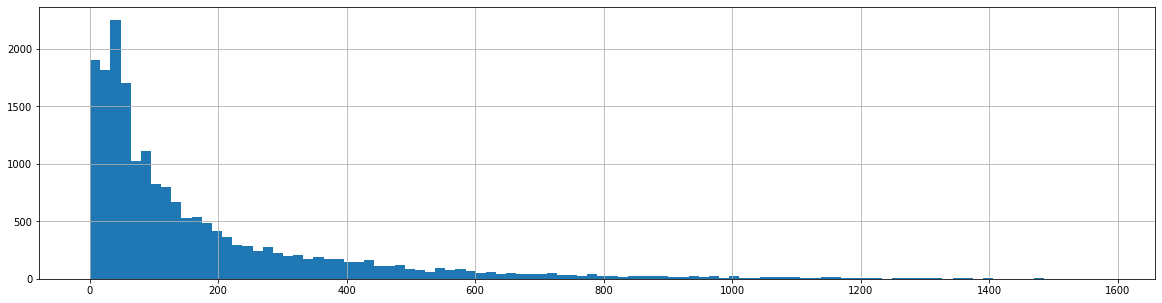

In [99]:
df['days_exposition'].hist(range = (1, 1580), bins = 100,figsize = (20,5))

<AxesSubplot:>

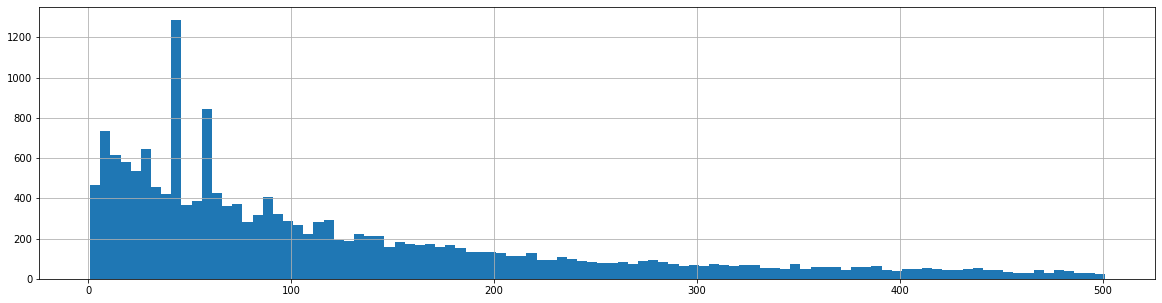

In [100]:
#Рассмотрим поближе значения от 1 до 501 дней
df['days_exposition'].hist(range = (1, 501), bins = 100,figsize = (20,5))

<AxesSubplot:>

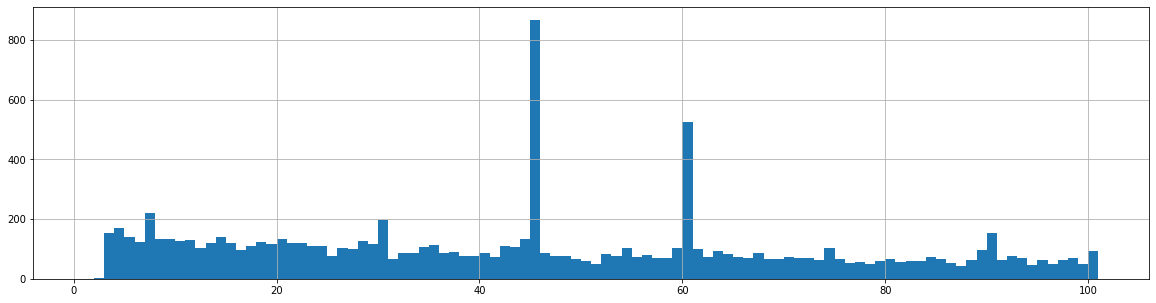

In [101]:
#Наконец, подробно посмотрим на значения от 1 до 101 дня
df['days_exposition'].hist(range = (1, 101), bins = 100,figsize = (20,5))

Вывод: Отличный показатель, если квартира продается за 3-4 месяца, нормальный если полгода - год. Все, что дольше года - очень скромный результат.
Также на гисторамме отчетливо видны пики в 30, 45, 60 и 90 дней - видимо, именно на такой срок позволяют размещать объявления онлайн-платформы "без регистрации и смс"

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Здорово, что ты заметил эти всплески! Это действительно особенность функционирования системы размещения объявлений. Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

**ЗАДАНИЕ** Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров

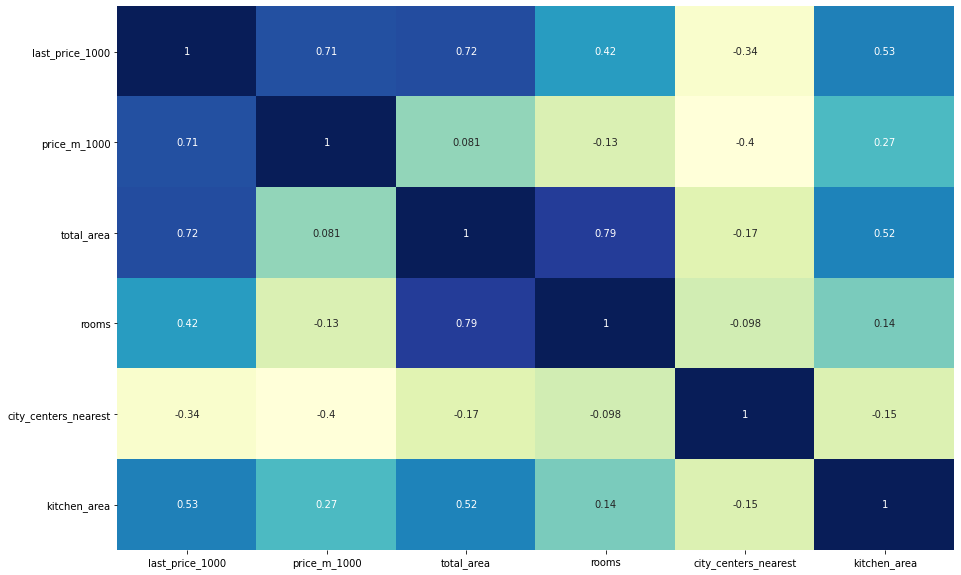

In [102]:
plt.figure(figsize=(15, 10))
seaborn.heatmap(df[['last_price_1000', 'price_m_1000', 'total_area', 'rooms', 'city_centers_nearest', 'kitchen_area']].corr(), annot=True, cmap='YlGnBu', cbar=False)
plt.show()

Тепловая карта показывает очевидные вещи - площадь квартиры и цена за квадратный метр - наиболее определяющие факторы в формировании общей стоимости.
Также видна обратнопропорциональная зависимость цены от расстояния до центра. Чем меньше расстояние - тем больше цена. Но этот фактор далеко не такой решающий, как метраж.

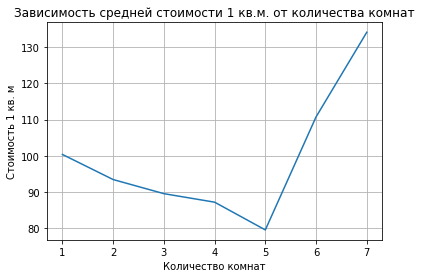

In [103]:
#Рассмотрим зависимость средней стоимости 1кв метра в зависимости от количества комнат
df[df['rooms'] < 8].groupby('rooms')['price_m_1000'].mean().plot()
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость 1 кв. м')
plt.title('Зависимость средней стоимости 1 кв.м. от количества комнат')
plt.grid()
plt.show()

В однушках в среднем стоимость квадратного метра выше, чем в двушках и трешках. Все, что имеет больше 5 комнат - элитная недвижимость и стоимость квадратного метра там соответствующая. Также стоит отметить, что количество лотов с 5 комнатами и более заметно меньше - а это сильно искажает среднюю величину.

<AxesSubplot:xlabel='floor_type'>

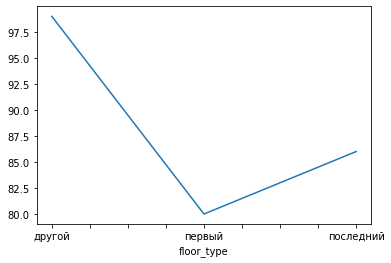

In [104]:
#Рассмотрим зависимость стоимсти квадратного метра от этажа
df.groupby('floor_type')['price_m_1000'].mean().plot()

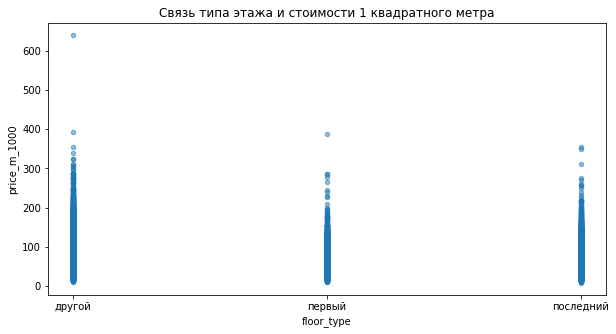

In [105]:
# То же самое, только другой тип графика
df.plot.scatter('floor_type', 'price_m_1000', figsize=(10,5), alpha=0.5)
plt.title('Связь типа этажа и стоимости 1 квадратного метра')
plt.show()

Самый дорогой - не первый и не последний. Самый дешевый - первый.

<AxesSubplot:xlabel='floors_total'>

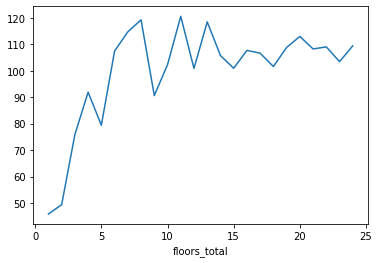

In [106]:
#Посмотрим зависимость стоимости 1 квадратного метра от общей этажности здания
df[df['floors_total'] < 25].groupby('floors_total')['price_m_1000'].mean().plot()


Чем меньше этажность здания - тем ниже средняя стоимость квадратного метра. Это также можно объяснить тем, что в деревнях и пгт средняя этажность ниже и они сильно влияют на общую картину.

<AxesSubplot:xlabel='day_exposition', ylabel='price_m_1000'>

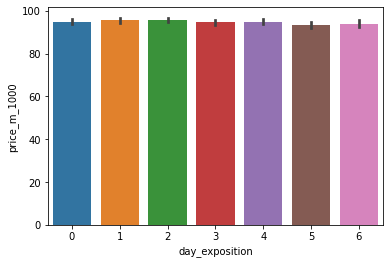

In [107]:
seaborn.barplot(data = df, x = 'day_exposition', y = 'price_m_1000')

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для дня недели, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану. Графики у тебя уже есть, поэтому остаётся только удалить расчет корреляции)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удалил, барплот добавил. Графики показывают то же самое.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

<AxesSubplot:xlabel='День недели', ylabel='Стоимость квартир, тыс. руб'>

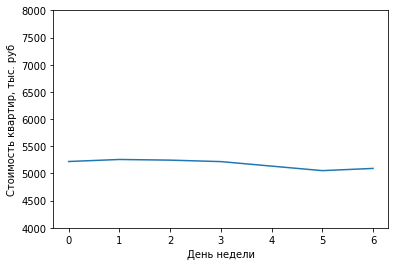

In [108]:
#Диаграмма показывает слабую корреляцию. Попробуем построить графики для каждого параметра по отдельности
df.groupby('day_exposition')['last_price_1000'].mean().plot(xlabel='День недели', ylabel='Стоимость квартир, тыс. руб', ylim = (4000, 8000))

<AxesSubplot:xlabel='День недели', ylabel='Стоимость 1кв м, тыс. руб'>

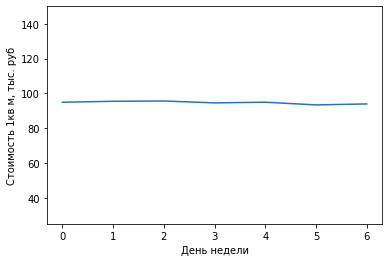

In [109]:
df.groupby('day_exposition')['price_m_1000'].mean().plot(xlabel='День недели', ylabel='Стоимость 1кв м, тыс. руб', ylim = (25, 150))

In [110]:
df['day_exposition'].value_counts()

3    3959
1    3900
4    3734
2    3674
0    3352
5    1812
6    1594
Name: day_exposition, dtype: int64

Как правило, стоимость квартир, которые выкладывают в воскресенье на 1-2 процента ниже остальных. Но в целом, зависимость стоимости квартиры от дня публикации объявления минимальная. Также стоит отметить, что в выходные в два раза меньше выставленных лотов - именно это может влиять на отмеченные флуктуации.

<AxesSubplot:xlabel='Месяц', ylabel='Стоимость квартир, тыс. руб'>

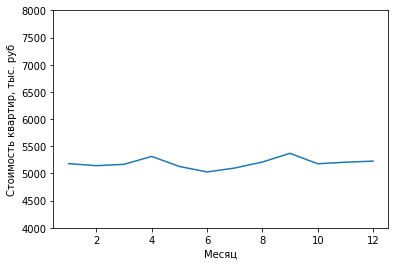

In [111]:
df.groupby('month_exposition')['last_price_1000'].mean().plot(xlabel='Месяц', ylabel='Стоимость квартир, тыс. руб', ylim = (4000, 8000))

<AxesSubplot:xlabel='Месяц', ylabel='Стоимость 1кв м, тыс. руб'>

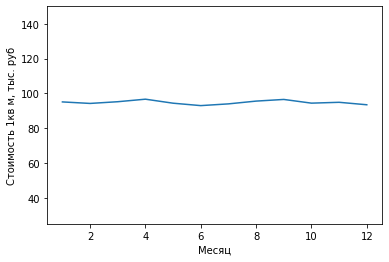

In [112]:
df.groupby('month_exposition')['price_m_1000'].mean().plot(xlabel='Месяц', ylabel='Стоимость 1кв м, тыс. руб', ylim = (25, 150))

Корреляция по месяцам тоже минимальная, едва заметные спады стоимости в июне, августе и октябре; подъемы - в апреле, сентябре и декабре. 

<AxesSubplot:xlabel='ГОД', ylabel='Стоимость квартир, тыс. руб'>

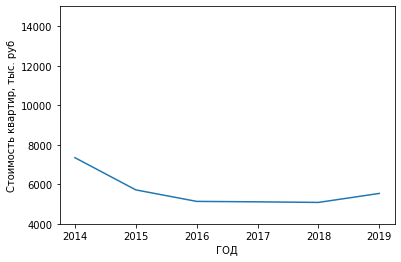

In [113]:
df.groupby('year_exposition')['last_price_1000'].mean().plot(xlabel='ГОД', ylabel='Стоимость квартир, тыс. руб', ylim = (4000, 15000))

In [114]:
df['year_exposition'].value_counts()

2018    8015
2017    7640
2019    2679
2016    2551
2015    1037
2014     103
Name: year_exposition, dtype: int64

Видом этого графика мы обязаны минимальному количеству объявлений выложенных в 2014 году. Столь малое значение искажает график.
Исходя их имеющихся данных, сделать вывод о динамике стоимости квартир невозможно.

ВЫВОД: Ощутимой корреляции между ценой и днем, месяцем и годом объявления нет. Зато есть корреляция в количестве выложенных объявлений.

**Общая площадь, жилая площадь и площадь кухни**

Еще раз построим диаграмму корреляции между этими факторами.


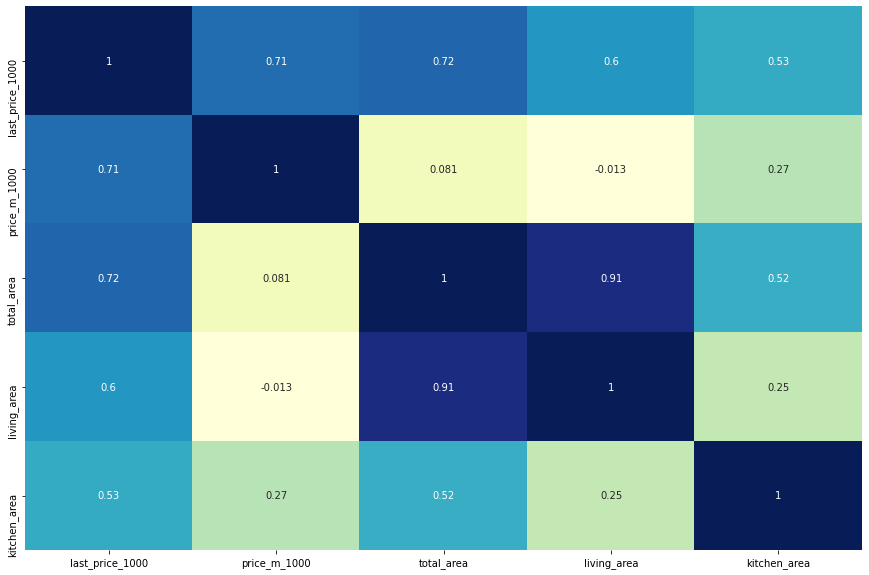

In [115]:
plt.figure(figsize=(15, 10))
seaborn.heatmap(df[['last_price_1000', 'price_m_1000', 'total_area', 'living_area', 'kitchen_area']].corr(), annot=True, cmap='YlGnBu', cbar=False)
plt.show()

Между площадью квартиры и ценой на нее очевидна линейная зависимость. То же касается общей площади (2й по силе фактор) и площади кухни(3й по силе влияния фактор из рассматриваемых)

Поскольку квартиры наименьшей площади имеют наибольшую стоимость 1кв метра, представленные выше факторы оказывают слабое влияние на стоимость квадратного метра.

**ЗАДАНИЕ** Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [116]:
df['locality_name_short'].value_counts().head(10)
df_top_10 = df['locality_name_short'].value_counts()[:10]
df_top_10_index = df_top_10.index

In [117]:
top_10_mean = (df
                      .query('locality_name_short in @df_top_10_index')
                      .pivot_table(index='locality_name_short', values='price_m_1000', aggfunc='mean')
                      .sort_values('price_m_1000', ascending=False))
top_10_mean

,price_m_1000
locality_name_short,
Санкт-Петербург,109.051097
Пушкин,101.385053
Кудрово,95.398097
Парголово,90.417106
Мурино,86.012633
Шушары,78.770802
Колпино,75.369846
Гатчина,68.526064
Всеволожск,68.503890


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10, так будет более наглядно)
</div>

In [118]:
top_10_min_max = (df
                      .query('locality_name_short in @df_top_10_index')
                      .pivot_table(index='locality_name_short', values='price_m_1000', aggfunc=['min','max']))
top_10_min_max

,min,max
,price_m_1000,price_m_1000
locality_name_short,,
Всеволожск,31.400000,640.398741
Выборг,18.750000,94.805195
Гатчина,10.507246,146.315789
Колпино,47.957371,125.000000
Кудрово,54.160347,160.401003
Мурино,50.000000,130.000000
Парголово,48.405467,138.522427
Пушкин,59.836066,167.410714


Самая высокая стоимость квадратного метра, как и ожидалось, -  в Санкт-Петербурге. В лидерах снова Санкт-Петербург из-за размера выборки имеет самое большое максимальное и второе с конца минимальное значения.

**ЗАДАНИЕ:** "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [119]:
df = df.query('locality_name == "Санкт-Петербург"')
df['city_center_km'] = (df['city_centers_nearest'] / 1000).round()
price_per_km = (df
               .pivot_table(index='city_center_km', values='price_m_1000', aggfunc='mean'))
price_per_km

/tmp/ipykernel_31/3760943587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city_center_km'] = (df['city_centers_nearest'] / 1000).round()


,price_m_1000
city_center_km,
0.0,126.652782
1.0,133.380346
2.0,131.519011
3.0,116.378130
4.0,126.204004
5.0,130.495433
6.0,129.340998
7.0,125.877852
8.0,121.379115


<AxesSubplot:xlabel='КМ', ylabel='Стоимость 1кв м'>

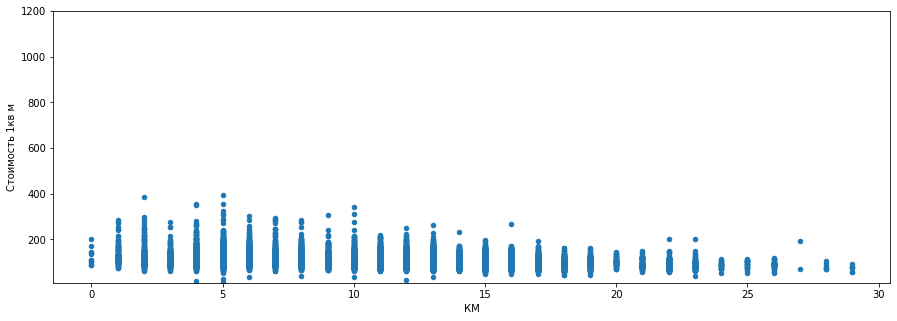

In [120]:
df.plot.scatter(x = 'city_center_km', y = 'price_m_1000', xlabel='КМ', ylabel='Стоимость 1кв м', ylim = (10, 1200), figsize = (15,5))

<AxesSubplot:xlabel='КМ', ylabel='Стоимость 1кв м'>

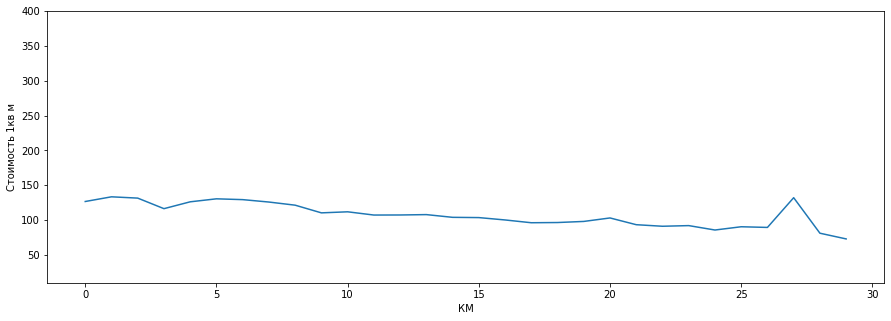

In [121]:
df.groupby('city_center_km')['price_m_1000'].mean().plot(xlabel='КМ', ylabel='Стоимость 1кв м', ylim = (10, 400), figsize = (15,5))

Вывод: Самая высокая цена - в переделах 1 км от центра. Также можно выделить несколько подгрупп:

1-3км исторический центр

3-4км падение цены -- старые промзоны (район вокруг Технологического института, Кировский завод, Ладожский вокзал)

5-7км второй пик стоимости (сталинские дома на Московском Проспекте + элитный район Крестовский Остров)

8км и дальше - спальные районы

Пик на 27км обусловлен наличием всего двух значений для этого расстояния (это видно из графика выше типа scatter) - это искажает значение средней цены.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

### Общий вывод

Для анализа предоставлен датасет из 22 колонок и 23699 строк 

**В процессе предобработки было удалено 1674 строки, то есть осталось 22025 строк, процент удаленных данных составил 7.06% данных.**

Удалены очевидные дубликаты.

Исправлены несколько ошибок в значениях, связанных с неверным положением запятой.

Исправлены или удалены экстремальные значения в нескольких столбцах.

столбец first_day_exposition приведен к типу datetime64

В числовых столбцах заменены типы на int, кроме столбцов с площадями и столбцов с расстояниями.

Столбец last_price сокращен на 1000 (цены указаны в тысячах рублей) и переименован в last_price_1000

**Удалены верхние 2 процента значений для следующих строк:
<br> общая площадь, жилая площадь, площадь кухни, цена
<br> Также из датафрейма удалены все квартиры, которые
<br> имеют более 10 комнат, площадь кухни меньше 4.5 кв метра, жилая площадь меньше 10 кв. метров**

По заданию было добавлено 7 столбцов, в которых были подсчитаны дополнительные параметры:

цена квадратного метра (в тысячах рублей)
день недели, месяц и год публикации объявления
тип этажа
соотношение жилой и общей площади, а также отношение площади кухни к общей.

Был проведен анализ и сделаны выводы по заданым вопросам:

Больше всего квартир с площадями 30-46 кв.м - это самые популярные 1 и 2-х комнатные. Следующие по популярности - с площадью до 75 кв.м(вероятно трехкомнатные).

Выявлено, что больше всего квартир продаются по цене в диапазоне 2-8 млн.руб. Пик продажи квартир идет в по цене около 4-5 млн рублей.
Большинство квартир находятся в домах с типовой этажностью - в 5, 9, 12, 16 И 24 этажей.
В домаж этажностью 5 этажей и ниже стоимость квартир заметно дешевле, чем в остальных.

Самые популярные квартиры - 1комнатная(количество объявлений - чуть больше 8000) и 2комнатные(около 8000). 3комнатных тоже довольно много - чуть меньше 6000, дальше кол-во сильно сокращаетя.
Стоимость 1 кв м выше всего - в однокомнатных квартирах.

Самой популярной высотой потолков является 2.5 м. В целом, высота потолков варируется между 2.5 и 3.2 метра с сокращением предложения квартир по мере увеличения высоты потолков.

Факторы, которые больше всего влияют на стоимость квартиры: 

Больше всего на стоимость квартиры влияет её площадь, а также зависящие от нее параметры (количество комнат, жилая площадь)
В меньшей степени - площадь кухни.
Среднее влияние оказывает удаленность от центра - корреляция составляет  -0,21 (обратнопропорцианальная зависимость)
Если говорить об этаже - самым "дешевым" является первый этаж, следующим по цене - последний и затем - все остальные.

Подавляющее большинство квартир продается в Санкт-Петербурге, средняя цена составляет около **109050р/кв.м.** 
Кроме  в Топ10 входят: поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, деревня Кудрово, Выборг с ценами 58000 - 103000р/кв.м.

Самая высокая цена - в переделах 1 км от центра. Также можно выделить несколько подгрупп:

1-3км исторический центр

3-4км падение цены -- старые промзоны (район вокруг Технологического института, Кировский завод, Ладожский вокзал)

5-7км второй пик стоимости (сталинские дома на Московском Проспекте + элитный район Крестовский Остров)

8км и дальше - спальные районы

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>


<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- выполнить задание 1.3
<br>- отбросить аномальные значения 
<br>- удалить расчет корреляции для времени продажи
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>

<br>- выполнить задание 1.3 -- гистораммы построены

<br>- отбросить аномальные значения -- в конце задания "Предобработка данных" я дал обширный комментарий, что и почему я сделал.

<br>- удалить расчет корреляции для времени продажи  -- удалил, на всякий случай построил барплот

<br>- поправить выводы там, где это необходимо -- Выводы остаются в силе.

</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Остались две правки:
<br>- отбросить аномальные значения 
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Экстремальные значения удалены, исправления в выводе выделены жирным шрифтом.
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v3:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x] изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x] выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x] выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод